# Time analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Importing and understanding database

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2015_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,924,9.0,12.0,61.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,0,0,1511,15.0,29.0,25.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,1,0,1412,14.0,35.0,21.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,0,1,1522,15.0,28.0,25.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,0,0,614,6.0,21.0,71.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,2015-09-04 18:00:00,021XX W CHURCHILL ST,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,0,0,1434,14.0,32.0,24.0,2015,2018-02-10 15:50:01,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,2015-09-05 13:00:00,025XX W CERMAK RD,THEFT,RETAIL THEFT,GROCERY FOOD STORE,1,0,1034,10.0,25.0,31.0,2015,2015-09-17 11:37:18,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,2015-09-05 11:30:00,031XX W WASHINGTON BLVD,ROBBERY,STRONGARM - NO WEAPON,STREET,0,1,1222,12.0,27.0,27.0,2015,2018-02-10 15:50:01,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1541733.0,NaN,NaN,NaN,11102325.804722,860134.560531,21714.0,10571765.0,11156741.0,11687324.0,12305810.0
Case Number,1541733,1541546,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1541733,702137,2015-01-01 00:01:00,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1541733,35135,001XX N STATE ST,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1541733,35,THEFT,352089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1541733,492,SIMPLE,168057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1535379,192,STREET,347634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1541733.0,NaN,NaN,NaN,0.206649,0.404902,0.0,0.0,0.0,0.0,1.0
Domestic,1541733.0,NaN,NaN,NaN,0.165116,0.371285,0.0,0.0,0.0,0.0,1.0
Beat,1541733.0,NaN,NaN,NaN,1143.751639,694.631456,111.0,612.0,1024.0,1712.0,2535.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Understanding the correlations between my numerical variables

In [8]:
crimes_date = crimes[["Primary Type","Date", "Year"]].copy()
crimes_date["Month"] = pd.DatetimeIndex(crimes["Date"]).month
crimes_date["Day"] = pd.DatetimeIndex(crimes["Date"]).day
crimes_date["Hour"] = pd.DatetimeIndex(crimes["Date"]).hour
crimes_date["Minutes"] = pd.DatetimeIndex(crimes["Date"]).minute
crimes_date

,Primary Type,Date,Year,Month,Day,Hour,Minutes
ID,,,,,,,
10224738,BATTERY,2015-09-05 13:30:00,2015,9,5,13,30
10224739,THEFT,2015-09-04 11:30:00,2015,9,4,11,30
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,0,1
10224740,NARCOTICS,2015-09-05 12:45:00,2015,9,5,12,45
10224741,ASSAULT,2015-09-05 13:00:00,2015,9,5,13,0
...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,17,0
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,0,0
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,0,0


In [9]:
crimes_date.dtypes

Primary Type            object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minutes                  int64
dtype: object

In [10]:
crimes_date["Year-Month"] = crimes_date["Year"].astype("str") + "-0" + crimes_date["Month"].astype("str")
crimes_date["Year-Month"] = crimes_date["Year-Month"].str.replace("-010","-10").str.replace("-011","-11").str.replace("-012","-12")
crimes_date

,Primary Type,Date,Year,Month,Day,Hour,Minutes,Year-Month
ID,,,,,,,,
10224738,BATTERY,2015-09-05 13:30:00,2015,9,5,13,30,2015-09
10224739,THEFT,2015-09-04 11:30:00,2015,9,4,11,30,2015-09
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,0,1,2018-09
10224740,NARCOTICS,2015-09-05 12:45:00,2015,9,5,12,45,2015-09
10224741,ASSAULT,2015-09-05 13:00:00,2015,9,5,13,0,2015-09
...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,17,0,2020-12
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,0,0,2017-02
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,0,0,2019-03


In [11]:
crimes_date["Year-Month-Day"] = crimes_date["Date"].astype('object')
crimes_date["Year-Month-Day"] = pd.DatetimeIndex(crimes_date["Year-Month-Day"]).strftime("%Y-%m-%d")
crimes_date

,Primary Type,Date,Year,Month,Day,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,
10224738,BATTERY,2015-09-05 13:30:00,2015,9,5,13,30,2015-09,2015-09-05
10224739,THEFT,2015-09-04 11:30:00,2015,9,4,11,30,2015-09,2015-09-04
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,0,1,2018-09,2018-09-01
10224740,NARCOTICS,2015-09-05 12:45:00,2015,9,5,12,45,2015-09,2015-09-05
10224741,ASSAULT,2015-09-05 13:00:00,2015,9,5,13,0,2015-09,2015-09-05
...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,0,0,2019-03,2019-03-02


In [12]:
crimes_date.dtypes

Primary Type              object
Date              datetime64[ns]
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minutes                    int64
Year-Month                object
Year-Month-Day            object
dtype: object

### Analyzing if there's any major tendency fro crimes in specifique time frames (month, day or hour)

<AxesSubplot:>

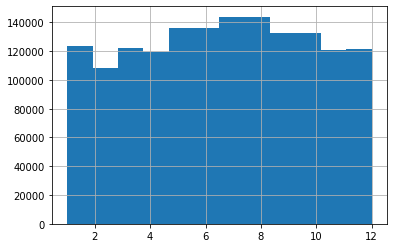

In [13]:
crimes_date["Month"].hist(bins=12)

<AxesSubplot:>

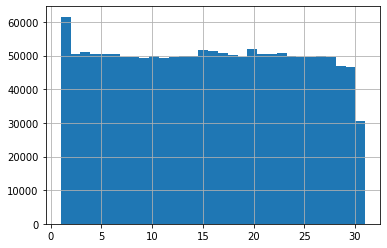

In [14]:
crimes_date["Day"].hist(bins=31)

<AxesSubplot:>

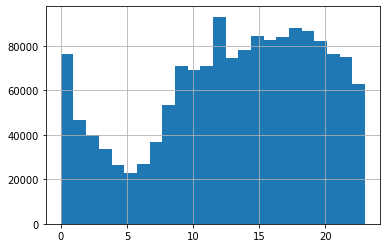

In [15]:
crimes_date["Hour"].hist(bins=24)

We can see that most crimes are reportedduring the day, which may indicate as well that they predominantly happen or are noticed during the day.

### Plotting a line graph with the variation of crimes per year 

In [16]:
crimes_date.groupby(by=["Year","Month"]).count()

Primary Type   Date    Day   Hour  Minutes  Year-Month  \
Year Month                                                           
2015 1             20922  20922  20922  20922    20922       20922   
     2             16389  16389  16389  16389    16389       16389   
     3             21671  21671  21671  21671    21671       21671   
     4             21718  21718  21718  21718    21718       21718   
     5             23697  23697  23697  23697    23697       23697   
...                  ...    ...    ...    ...      ...         ...   
2020 8             19733  19733  19733  19733    19733       19733   
     9             17754  17754  17754  17754    17754       17754   
     10            18242  18242  18242  18242    18242       18242   
     11            16384  16384  16384  16384    16384       16384   
     12            16166  16166  16166  16166    16166       16166   

            Year-Month-Day  
Year Month                  
2015 1               20922  
     2               16389  
     3               21671  
     4               21718  
     5               23697  
...                    ...  
2020 8               19733  
     9               17754  
     10              18242  
     11              16384  
     12              16166  

[72 rows x 7 columns]

In [17]:
crimes_date

,Primary Type,Date,Year,Month,Day,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,
10224738,BATTERY,2015-09-05 13:30:00,2015,9,5,13,30,2015-09,2015-09-05
10224739,THEFT,2015-09-04 11:30:00,2015,9,4,11,30,2015-09,2015-09-04
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,0,1,2018-09,2018-09-01
10224740,NARCOTICS,2015-09-05 12:45:00,2015,9,5,12,45,2015-09,2015-09-05
10224741,ASSAULT,2015-09-05 13:00:00,2015,9,5,13,0,2015-09,2015-09-05
...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,0,0,2019-03,2019-03-02


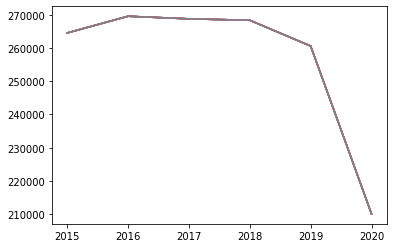

In [18]:
# Plotting the number of crimes per year
plt.plot(crimes_date.groupby("Year").count())

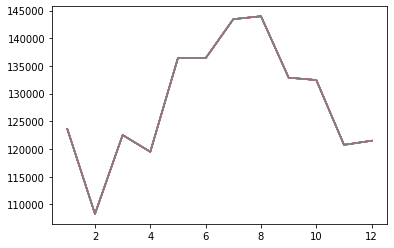

In [19]:
# Plotting the number of crimes per year (aggregating years)
plt.plot(crimes_date.groupby("Month").count())

In [ ]:
# Plotting the number of crimes per year (separating years)
plt.plot(crimes_date["Month"], crimes_date[crimes_date.Month==2015].groupby("Month").count(),
         crimes_date["Month"], crimes_date[crimes_date.Month==2016].groupby("Month").count(),
         crimes_date["Month"], crimes_date[crimes_date.Month==2017].groupby("Month").count(),
         crimes_date["Month"], crimes_date[crimes_date.Month==2018].groupby("Month").count(),
         crimes_date["Month"], crimes_date[crimes_date.Month==2019].groupby("Month").count(),
         crimes_date["Month"], crimes_date[crimes_date.Month==2020].groupby("Month").count()
        )

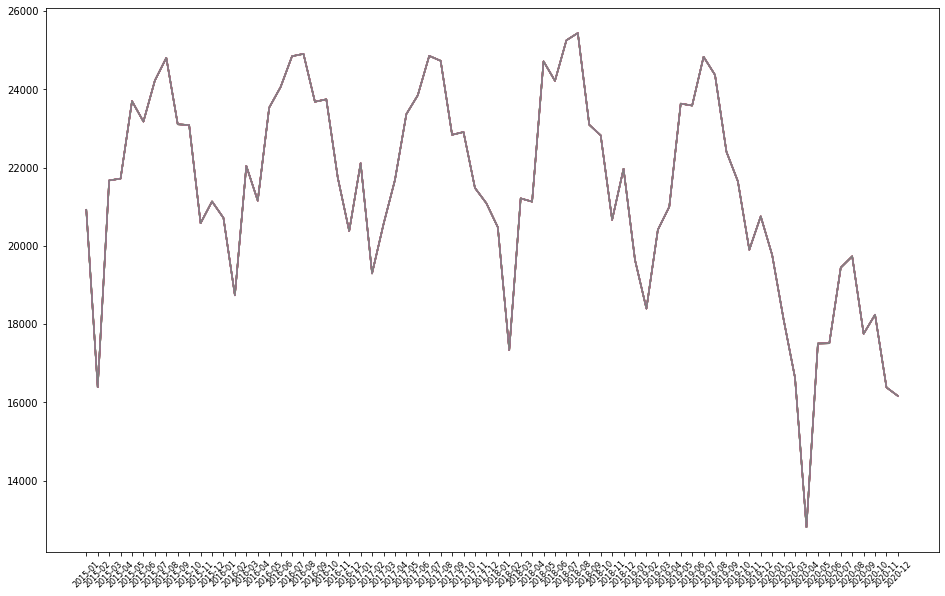

In [20]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=45,size=8)
plt.plot(crimes_date.groupby("Year-Month").count())

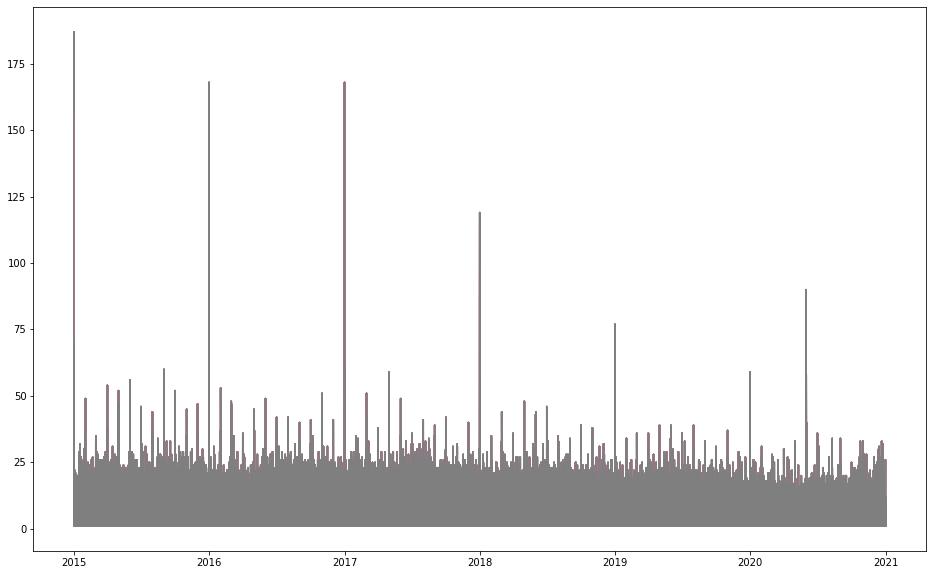

In [21]:
fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Date").count())

<ipython-input-22-d5f32fd985e9>:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=20, rotation =45)


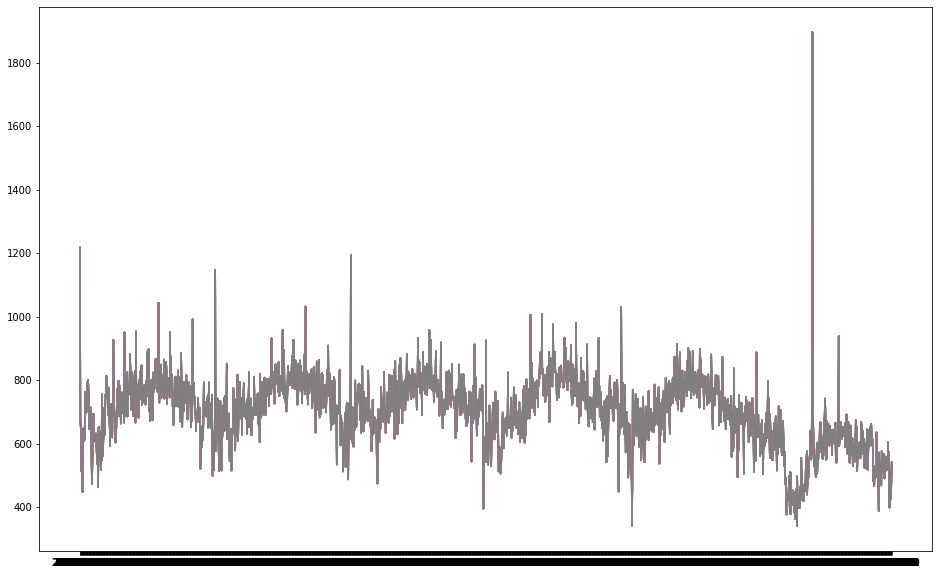

In [22]:
fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Year-Month-Day").count())
plt.locator_params(axis='x', nbins=20, rotation =45)

In [23]:
crimes_date.groupby("Year-Month-Day").count().sort_values("Date", ascending=False)

,Primary Type,Date,Year,Month,Day,Hour,Minutes,Year-Month
Year-Month-Day,,,,,,,,
2020-05-31,1897,1897,1897,1897,1897,1897,1897,1897
2015-01-01,1220,1220,1220,1220,1220,1220,1220,1220
2017-01-01,1195,1195,1195,1195,1195,1195,1195,1195
2016-01-01,1147,1147,1147,1147,1147,1147,1147,1147
2015-08-01,1044,1044,1044,1044,1044,1044,1044,1044
...,...,...,...,...,...,...,...,...
2020-04-02,377,377,377,377,377,377,377,377
2020-03-22,376,376,376,376,376,376,376,376
2020-04-14,363,363,363,363,363,363,363,363


In [24]:
terrible_days = crimes_date.groupby("Date").count()
terrible_days

,Primary Type,Year,Month,Day,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,
2015-01-01 00:00:00,156,156,156,156,156,156,156,156
2015-01-01 00:01:00,187,187,187,187,187,187,187,187
2015-01-01 00:02:00,1,1,1,1,1,1,1,1
2015-01-01 00:03:00,2,2,2,2,2,2,2,2
2015-01-01 00:04:00,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2020-12-31 23:38:00,1,1,1,1,1,1,1,1
2020-12-31 23:40:00,1,1,1,1,1,1,1,1
2020-12-31 23:45:00,6,6,6,6,6,6,6,6


In [25]:
terrible_days[terrible_days["Primary Type"]>=70].sort_values("Year-Month", ascending=False)

,Primary Type,Year,Month,Day,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,
2015-01-01 00:01:00,187,187,187,187,187,187,187,187
2016-01-01 00:01:00,168,168,168,168,168,168,168,168
2017-01-01 00:01:00,168,168,168,168,168,168,168,168
2015-01-01 00:00:00,156,156,156,156,156,156,156,156
2017-01-01 00:00:00,131,131,131,131,131,131,131,131
2016-01-01 00:00:00,120,120,120,120,120,120,120,120
2018-01-01 00:01:00,119,119,119,119,119,119,119,119
2018-01-01 00:00:00,99,99,99,99,99,99,99,99
2020-05-31 16:00:00,90,90,90,90,90,90,90,90


In [26]:
crimes_date.groupby(by=["Year", "Month"]).count()

Primary Type   Date    Day   Hour  Minutes  Year-Month  \
Year Month                                                           
2015 1             20922  20922  20922  20922    20922       20922   
     2             16389  16389  16389  16389    16389       16389   
     3             21671  21671  21671  21671    21671       21671   
     4             21718  21718  21718  21718    21718       21718   
     5             23697  23697  23697  23697    23697       23697   
...                  ...    ...    ...    ...      ...         ...   
2020 8             19733  19733  19733  19733    19733       19733   
     9             17754  17754  17754  17754    17754       17754   
     10            18242  18242  18242  18242    18242       18242   
     11            16384  16384  16384  16384    16384       16384   
     12            16166  16166  16166  16166    16166       16166   

            Year-Month-Day  
Year Month                  
2015 1               20922  
     2               16389  
     3               21671  
     4               21718  
     5               23697  
...                    ...  
2020 8               19733  
     9               17754  
     10              18242  
     11              16384  
     12              16166  

[72 rows x 7 columns]